<a href="https://colab.research.google.com/github/Andreaierardi/Machine-Learning-Project/blob/master/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!kaggle datasets download --force -d moltean/fruits

 47% 357M/760M [00:03<00:03, 106MB/s]
User cancelled operation


# Image classification with Neural Networks
## Machine Learning Project

Group: Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset
### 1.1 Libraries


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 


from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

## 1.2 Data Loading

In [ ]:
DATADIR = "fruits-360/Training"
DATADIR_test = "fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

### Split in test and training sets




In [ ]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/492 [00:00<?, ?it/s]

 45%|████▍     | 220/492 [00:00<00:00, 2197.90it/s]

100%|██████████| 492/492 [00:00<00:00, 2252.35it/s]

  3%|▎         | 4/131 [00:00<00:07, 17.93it/s]

  0%|          | 0/490 [00:00<?, ?it/s]

 47%|████▋     | 228/490 [00:00<00:00, 2279.75it/s]

100%|██████████| 490/490 [00:00<00:00, 2367.62it/s]

  5%|▍         | 6/131 [00:00<00:08, 14.09it/s]

  0%|          | 0/492 [00:00<?, ?it/s]

100%|██████████| 492/492 [00:00<00:00, 2538.90it/s]

  5%|▌         | 7/131 [00:00<00:13,  9.12it/s]

  0%|          | 0/456 [00:00<?, ?it/s]

100%|██████████| 456/456 [00:00<00:00, 2497.72it/s]

 10%|▉         | 13/131 [00:00<00:10, 11.60it/s]

  0%|          | 0/984 [00:00<?, ?it/s]

 27%|██▋       | 267/984 [00:00<00:00, 2661.95it/s]

 54%|█████▍    | 530/984 [00:00<00:00, 2650.82it/s]

100%|██████████| 984/984 [00:00<00:00, 2623.51it/s]

 12%|█▏        | 16/131 [00:01<00:11, 10.16it/s]

  0%|          | 0/738 [00:00

In [ ]:
x_train, y_train= train

In [ ]:
x_test, y_test = test

### Train and test shape


In [ ]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (32607, 32, 32, 3)
y:  (32607,)
Test shape
X:  (10906, 32, 32, 3)
y:  (10906,)


## 1.2 Pre-processing

### Pre-process the labels and the images


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images


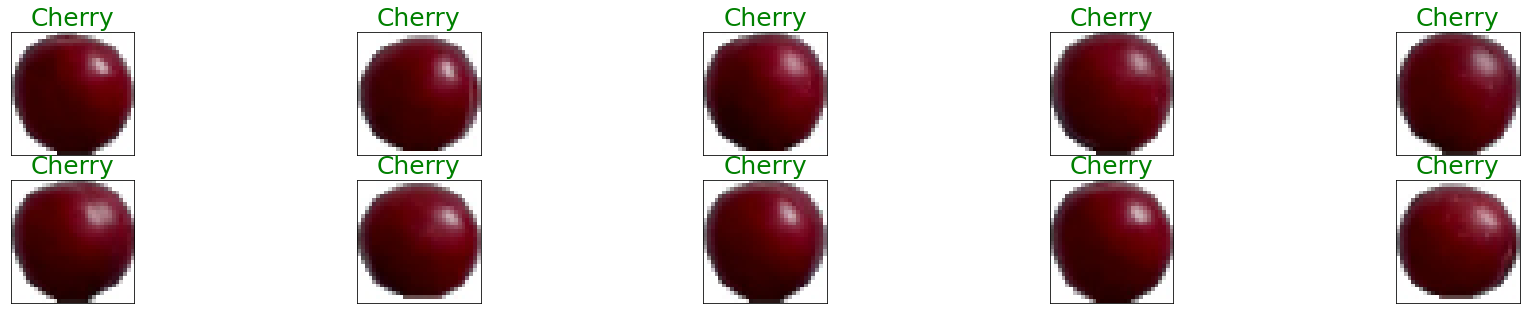

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data


In [ ]:
from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled


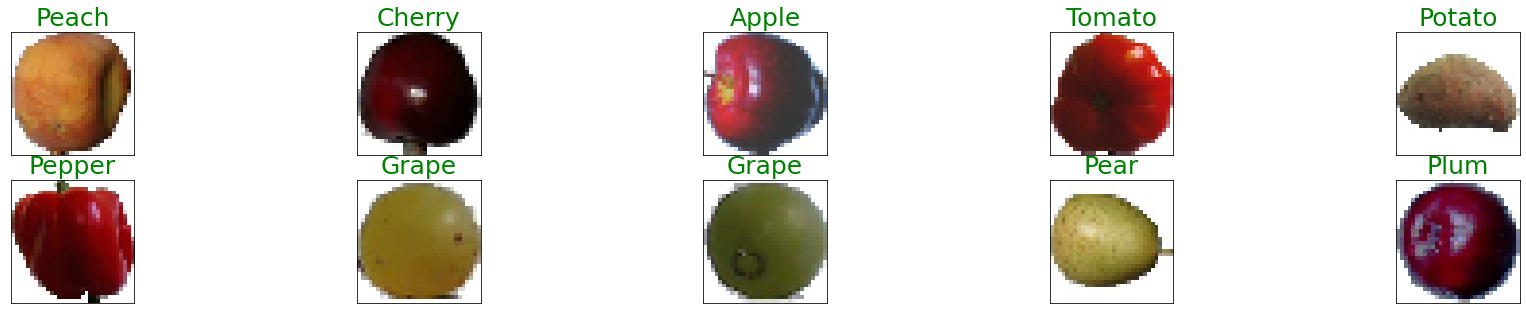

In [ ]:


import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})



### Split in validation and test set


In [ ]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  10906
Validation split len: 8724


In [ ]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_vaild = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (32607, 32, 32, 3)
Train y : (32607, 10)
1st training image shape  (32, 32, 3)
Vaildation X :  (8724, 32, 32, 3)
Vaildation y : (8724, 10)
Test X :  (2182, 32, 32, 3)
Test y :  (2182, 10)


# 1.3  Convolutional Neural Newtworks

## First Approach


In [ ]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Train on 32607 samples, validate on 8724 samples
Epoch 1/10
 - 31s - loss: 0.7637 - accuracy: 0.7270 - val_loss: 0.2287 - val_accuracy: 0.9100
Epoch 2/10
 - 30s - loss: 0.1256 - accuracy: 0.9568 - val_loss: 0.1267 - val_accuracy: 0.9519
Epoch 3/10
 - 30s - loss: 0.0592 - accuracy: 0.9804 - val_loss: 0.0681 - val_accuracy: 0.9795
Epoch 4/10
 - 30s - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.0803 - val_accuracy: 0.9775
Epoch 5/10
 - 30s - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0407 - val_accuracy: 0.9854
Epoch 6/10
 - 30s - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0757 - val_accuracy: 0.9767
Epoch 7/10
 - 30s - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.0208 - val_accuracy: 0.9922
Epoch 8/10
 - 30s - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0267 - val_accuracy: 0.9928
Epoch 9/10
 - 30s - loss: 0.0216 - accuracy: 0.9944 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 10/10
 - 32s - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0264 - val_accuracy: 0.9893


In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])




 Test accuracy: 0.9867094159126282


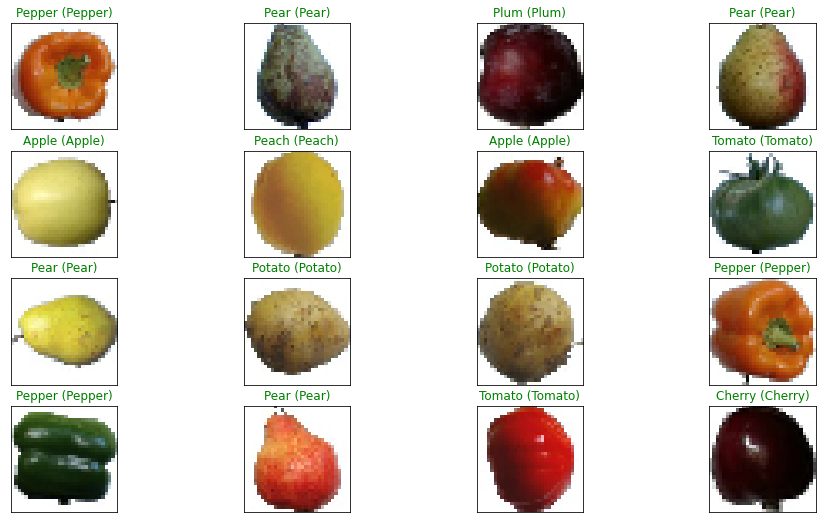

In [ ]:


y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



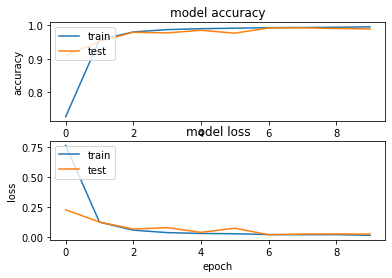

In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Parameters Tuning


In [ ]:
from datetime import datetime
from keras.callbacks import TensorBoard

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, 2, input_shape=(32,32,3),padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=2))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, 2))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=2))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10,activation = 'softmax'))
    

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            #
            #!
            #categorical_crossentropy
            #!
            #
            model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
            print('Compiled!')
            
            history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
        callbacks=[tensorboard]
        )

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

Fruits-1-conv-32-nodes-0-dense-01072020-134508
Compiled!
Train on 32607 samples, validate on 8724 samples
Epoch 1/10


KeyboardInterrupt: ignored

#  1.4 MobileNetV2


In [54]:
from keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
print('Compiled!')

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [55]:


history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )



Train on 32607 samples, validate on 8724 samples
Epoch 1/10
 - 282s - loss: 0.6517 - accuracy: 0.7940 - val_loss: 2.2099 - val_accuracy: 0.1964
Epoch 2/10
 - 272s - loss: 0.1821 - accuracy: 0.9507 - val_loss: 2.2739 - val_accuracy: 0.1964
Epoch 3/10
 - 265s - loss: 0.1222 - accuracy: 0.9691 - val_loss: 2.2834 - val_accuracy: 0.1553
Epoch 4/10
 - 266s - loss: 0.1475 - accuracy: 0.9599 - val_loss: 2.1838 - val_accuracy: 0.1965
Epoch 5/10
 - 264s - loss: 0.0727 - accuracy: 0.9824 - val_loss: 1.1296 - val_accuracy: 0.6738
Epoch 6/10
 - 265s - loss: 0.0995 - accuracy: 0.9771 - val_loss: 1.1352 - val_accuracy: 0.8370
Epoch 7/10
 - 265s - loss: 0.1084 - accuracy: 0.9758 - val_loss: 0.8599 - val_accuracy: 0.8942
Epoch 8/10
 - 270s - loss: 0.0360 - accuracy: 0.9918 - val_loss: 0.5527 - val_accuracy: 0.9325
Epoch 9/10
 - 269s - loss: 0.0496 - accuracy: 0.9893 - val_loss: 1.0994 - val_accuracy: 0.8840
Epoch 10/10
 - 280s - loss: 0.0585 - accuracy: 0.9860 - val_loss: 5.2834 - val_accuracy: 0.7351


In [56]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7291475534439087


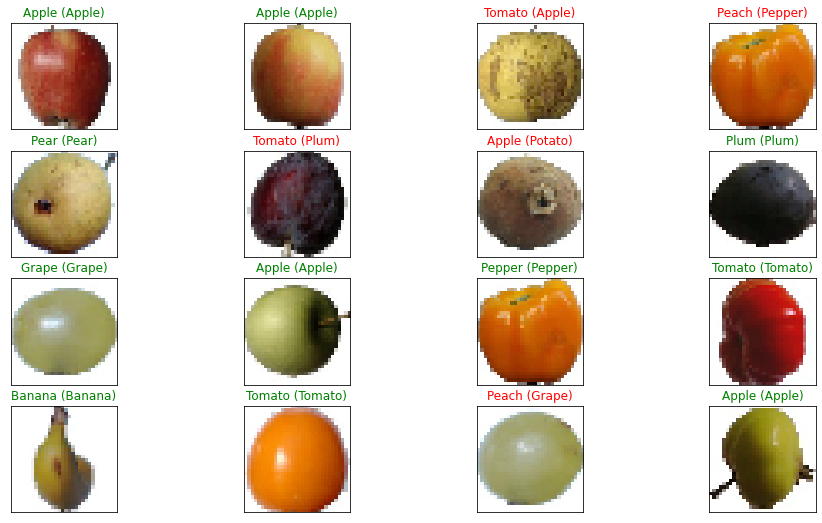

In [57]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

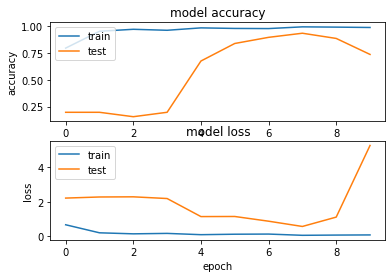

In [58]:
#Finally lets visualize the loss and accuracy wrt epochs

plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 1.5 LeNet Neural Networks


In [59]:
#leNet Neural Network

input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [60]:


history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_vaild),
                    verbose = 2
                    )



Epoch 1/10
1019/1019 - 38s - loss: 0.3700 - accuracy: 0.8849 - val_loss: 0.1621 - val_accuracy: 0.9523
Epoch 2/10
1019/1019 - 38s - loss: 0.0123 - accuracy: 0.9987 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 3/10
1019/1019 - 38s - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.0738 - val_accuracy: 0.9794
Epoch 4/10
1019/1019 - 38s - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0606 - val_accuracy: 0.9840
Epoch 5/10
1019/1019 - 38s - loss: 5.0175e-04 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9834
Epoch 6/10
1019/1019 - 38s - loss: 2.5610e-04 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9833
Epoch 7/10
1019/1019 - 38s - loss: 1.4958e-04 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9841
Epoch 8/10
1019/1019 - 38s - loss: 9.0525e-05 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9843
Epoch 9/10
1019/1019 - 38s - loss: 5.5025e-05 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9846
Epoch 10/10
1019/1019 - 38s - loss: 3.3074e-05 - accu

In [61]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9839596748352051


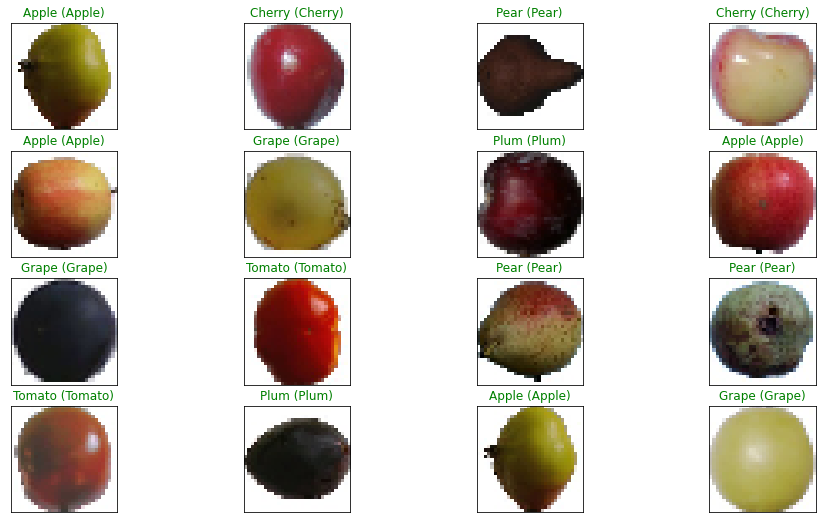

In [62]:


y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



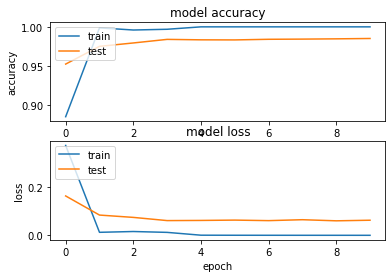

In [63]:
#plots

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()